## Observations and Insights 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

mouse_df = pd.read_csv(mouse_metadata_path)
study_df = pd.read_csv(study_results_path)

combined_df = pd.merge(mouse_df,study_df,how='inner',on='Mouse ID')
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
number_of_mice = combined_df['Mouse ID'].nunique()
print(f'There are {number_of_mice} unique mice in this study')

There are 249 unique mice in this study


In [3]:
duplicates = combined_df[combined_df.duplicated(['Mouse ID','Timepoint'],keep='last')]
print (duplicates['Mouse ID'].unique())

['g989']


In [4]:
print (combined_df.loc[combined_df['Mouse ID'] == 'g989'])

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [5]:
clean_df = combined_df.loc[combined_df['Mouse ID'] != 'g989']

In [6]:
number_of_mice2 = clean_df['Mouse ID'].nunique()
print(f'There are {number_of_mice2} unique mice in this clean dataframe')

There are 248 unique mice in this clean dataframe


## Summary Statistics

In [7]:
group_df = clean_df.groupby('Drug Regimen')
mean = group_df['Tumor Volume (mm3)'].mean()
median = group_df['Tumor Volume (mm3)'].median()
variance = group_df['Tumor Volume (mm3)'].var()
stddev = group_df['Tumor Volume (mm3)'].std()
sem = group_df['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({
    'Mean':mean,
    'Median':median,
    'Variance':variance,
    'Standard Dev':stddev,
    'SEM':sem
})
summary_df

,Mean,Median,Variance,Standard Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
summary_df2 = group_df.agg({'Tumor Volume (mm3)' : ['mean','median','var','std','sem']})
summary_df2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

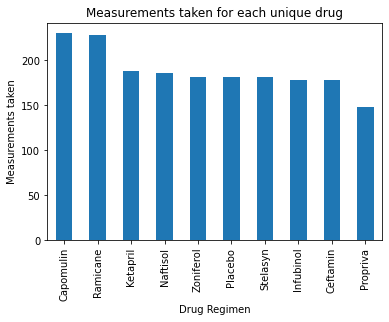

In [9]:
pandas_bar = clean_df['Drug Regimen'].value_counts().plot(kind='bar',xlabel = 'Drug Regimen',ylabel='Measurements taken', \
                                                         title = 'Measurements taken for each unique drug')


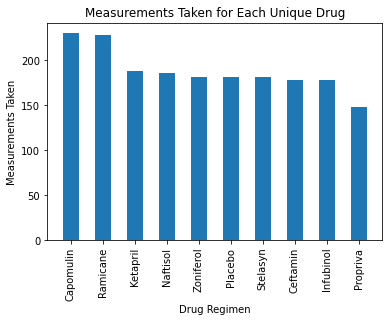

In [10]:
group_count_df = group_df.count().reset_index().sort_values('Mouse ID',ascending = False)
counts = list(group_count_df['Mouse ID'])
drugs = list(group_count_df['Drug Regimen'])

plt_bar = plt.bar(drugs,counts,width=.5)
plt_bar = plt.xlabel("Drug Regimen")
plt_bar = plt.ylabel("Measurements Taken")
plt_bar = plt.title("Measurements Taken for Each Unique Drug")
plt_bar = plt.xticks(rotation='90')


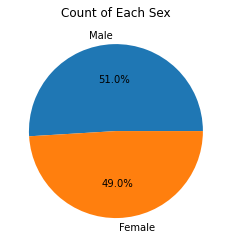

In [11]:
pandas_pie = clean_df['Sex'].value_counts().plot(kind='pie', title = 'Count of Each Sex',autopct='%1.1f%%', label = "")


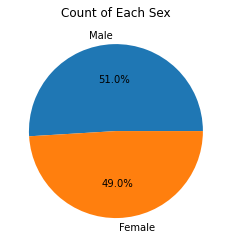

In [12]:
sex_count_df = clean_df.groupby('Sex').count().reset_index().sort_values('Sex', ascending = False)
genders = list(sex_count_df['Sex'])
counts2 = list(sex_count_df['Mouse ID'])

plt_pit = plt.pie(counts2,labels=genders,autopct='%1.1f%%')
plt_pie = plt.title("Count of Each Sex")

## Quartiles, Outliers and Boxplots

In [13]:
max_tp = clean_df['Timepoint'].max()
master_df = clean_df.loc[(clean_df['Drug Regimen'].isin(['Capomulin','Ramicane', 'Infubinol', 'Ceftamin'])) & \
                         (clean_df['Timepoint'] == max_tp)]

In [14]:
label_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# It made more sense for me to choose outliers out of the sample used rather than the whole set. It gives 0 outliers.
iqr = master_df['Tumor Volume (mm3)'].quantile(0.75) - master_df['Tumor Volume (mm3)'].quantile(0.25)
low_bound = master_df['Tumor Volume (mm3)'].quantile(0.25) - (1.5 * iqr)
upp_bound = master_df['Tumor Volume (mm3)'].quantile(0.75) + (1.5 * iqr)

# Here is the code that would generate outliers by using the entire clean df. It gives 2 outliers.
#iqr = clean_df['Tumor Volume (mm3)'].quantile(0.75) - clean_df['Tumor Volume (mm3)'].quantile(0.25)
#low_bound = clean_df['Tumor Volume (mm3)'].quantile(0.25) - (1.5 * iqr)
#upp_bound = clean_df['Tumor Volume (mm3)'].quantile(0.75) + (1.5 * iqr)

   
    
cap_df = master_df.loc[master_df['Drug Regimen'] == 'Capomulin']
ram_df = master_df.loc[master_df['Drug Regimen'] == 'Ramicane']
inf_df = master_df.loc[master_df['Drug Regimen'] == 'Infubinol']
cef_df = master_df.loc[master_df['Drug Regimen'] == 'Ceftamin']

cap_out = cap_df.loc[(cap_df['Tumor Volume (mm3)'] > upp_bound) | (cap_df['Tumor Volume (mm3)'] < low_bound)]
ram_out = ram_df.loc[(ram_df['Tumor Volume (mm3)'] > upp_bound) | (ram_df['Tumor Volume (mm3)'] < low_bound)]
inf_out = inf_df.loc[(inf_df['Tumor Volume (mm3)'] > upp_bound) | (inf_df['Tumor Volume (mm3)'] < low_bound)]
cef_out = cef_df.loc[(cef_df['Tumor Volume (mm3)'] > upp_bound) | (cef_df['Tumor Volume (mm3)'] < low_bound)]
    
print (cap_out,
       ram_out,
       inf_out,
       cef_out)
   

Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: [] Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: [] Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: [] Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []


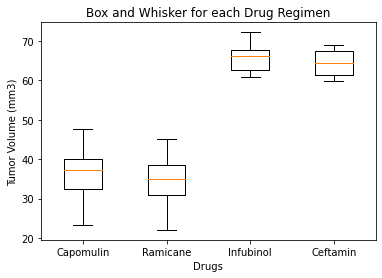

In [15]:
fig1, ax1 = plt.subplots()
data = [cap_df['Tumor Volume (mm3)'],ram_df['Tumor Volume (mm3)'],inf_df['Tumor Volume (mm3)'],cef_df['Tumor Volume (mm3)']]
ax1.set_title('Box and Whisker for each Drug Regimen')
ax1.boxplot(data)
plt.xticks([1, 2, 3, 4], label_list)
plt.xlabel("Drugs")
plt.ylabel("Tumor Volume (mm3)")
ax1

## Line and Scatter Plots

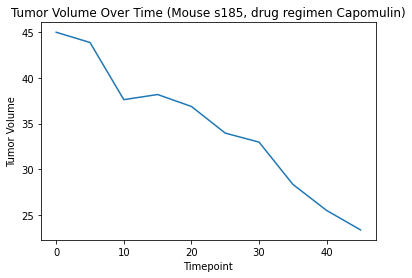

In [16]:
cap_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
mouse_id = cap_df.iloc[1,0]
mouse_df = cap_df.loc[cap_df['Mouse ID'] == mouse_id]
time = list(mouse_df['Timepoint'])
volume = list(mouse_df['Tumor Volume (mm3)'])

plt_line = plt.plot(time,volume)
plt_line = plt.xlabel("Timepoint")
plt_line = plt.ylabel("Tumor Volume")
plt_line = plt.title(f"Tumor Volume Over Time (Mouse {mouse_id}, drug regimen Capomulin)")

The correlation coefficient is 0.8419363424694717


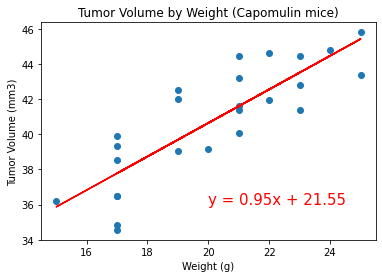

In [17]:
cap_df2 = cap_df.groupby('Mouse ID').mean()
weight = list(cap_df2['Weight (g)'])
vol = list(cap_df2['Tumor Volume (mm3)'])
plt_scatter = plt.scatter(weight, vol)
plt_scatter = plt.xlabel("Weight (g)")
plt_scatter = plt.ylabel("Tumor Volume (mm3)")
plt_scatter = plt.title("Tumor Volume by Weight (Capomulin mice)")
corr_co = stats.pearsonr(weight,vol)[0]
print (f'The correlation coefficient is {corr_co}')
slope, intercept, rvalue, pvalue, stderr = stats.linregress(weight,vol)
regress_values = pd.to_numeric(weight) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt_scatter = plt.plot(weight,regress_values,"r-")
plt_scatter = plt.annotate(line_eq,(20,36),fontsize=15,color="red")

## Correlation and Regression